# Bayesian exploration using script

In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt

from xopt.bayesian_exploration import bayesian_exploration

# test function
from xopt.evaluators import test_TNK
?bayesian_exploration

Signature: bayesian_exploration(config, evaluate_f, **kwargs)
Docstring:
Bayesian exploration algorithm

Parameters
----------
config : dict
    Varabiles, objectives, constraints and statics dictionary, see xopt documentation for detials

evaluate_f : callable
    Returns dict of outputs after problem has been evaluated


Optional kwargs arguments
--------
n_steps : int, default: 30
    Number of optimization steps to take

executor : futures.Executor, default: None
    Executor object to evaluate problem using multiple threads or processors

n_initial_samples : int, defualt: 5
    Number of initial sobel_random samples to take to start optimization. Ignored if initial_x is not None.

custom_model : callable, optional
    Function in the form f(train_x, train_y) that returns a botorch model instance

output_path : str, optional
    Location to save optimization data and models.

verbose : bool, default: False
    Specify if the algorithm should print optimization progress.

restart_da

In [6]:
# Get VOCS
VOCS = test_TNK.VOCS

# technically this is not necessary, but its good to be explict
VOCS['objectives'] = {'y1' : None}

# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK


# Run - see comments for example options
results = bayesian_exploration(VOCS, EVALUATE,
                               n_initial_samples=5,                   ## Specify number of initial random samples
                               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
                               use_gpu=False,                         ## Use GPU
                               n_steps=30,                            ## number of optimization step
                               # restart_data_file = 'results.json',  ## restart optimization file
                               # batch_size = 5,                      ## Specify batched exploration
                               # custom_model = myCustomModel,        ## Specify custom model creation function
                               # sigma=torch.eye(2) * 0.01,           ## Specify proximal term (requires batch_size = 1)
                               verbose=False)

dict_keys(['variables', 'objectives', 'constraints', 'constraint_status', 'feasibility', 'model'])


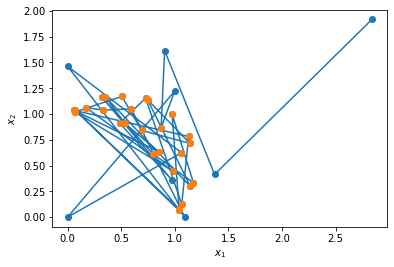

In [3]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o')
ax.plot(valid[:, 0], valid[:, 1], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

plt.show()

### Bayesian exploration with proximal biasing
- should result in a smoother path through input space

In [7]:
# Get VOCS
VOCS = test_TNK.VOCS

# technically this is not necessary, but its good to be explict
VOCS['objectives'] = {'y1' : None}
# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK


# Run - see comments for example options
results = bayesian_exploration(VOCS, EVALUATE,
                               n_initial_samples=5,                   ## Specify number of initial random samples
                               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
                               use_gpu=False,                         ## Use GPU
                               n_steps=30,                            ## number of optimization step
                               # restart_data_file = 'results.json',  ## restart optimization file
                               # batch_size = 5,                      ## Specify batched exploration
                               # custom_model = myCustomModel,        ## Specify custom model creation function
                               sigma=torch.eye(2) * 0.5,            ## Specify proximal term (requires batch_size = 1)
                               verbose=False)

dict_keys(['variables', 'objectives', 'constraints', 'constraint_status', 'feasibility', 'model'])


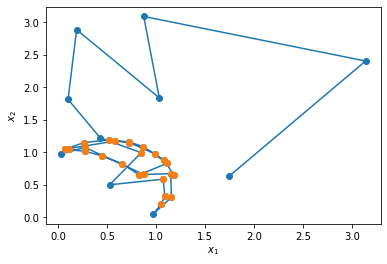

In [5]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o')
ax.plot(valid[:, 0], valid[:, 1], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

plt.show()